In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [39]:
df = pd.read_csv('../assets/dataset.csv')
df = df.dropna()

# Logistic Regression

In [53]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity' ]] 
y = df['Churn'] 
X = pd.get_dummies(X, columns=['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logistic_regression.predict(X_test)

In [44]:
accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)

In [45]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Accuracy: 0.78708303761533
Confusion Matrix:
 [[942  99]
 [201 167]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.63      0.45      0.53       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409



In [46]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
y_test = y_test.map({'No': 0, 'Yes': 1})
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

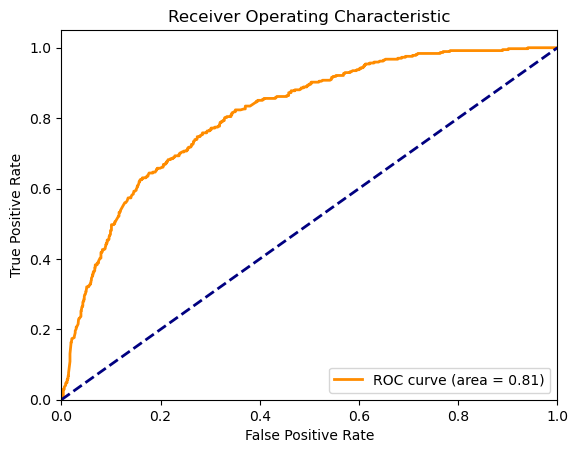

In [48]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Multiple Regression

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train.map({'No': 0, 'Yes': 1})


In [62]:
multiple_regression = LinearRegression()
multiple_regression.fit(X_train,y_train)

LinearRegression()

In [63]:
# Print the coefficients of the model
print('Coefficients: \n', multiple_regression.coef_)

# Make predictions on the test set
y_pred = multiple_regression.predict(X_test)

# Print the predictions
print('Predictions: \n', y_pred)

Coefficients: 
 [ 0.07632804 -0.00610852  0.0045298  -0.0045298  -0.00556907  0.00556907
  0.02049013 -0.02049013 -0.05945969  0.13071434 -0.07125464  0.08553653
 -0.07125464 -0.01428189]
Predictions: 
 [0.32849559 0.15934219 0.2653283  ... 0.36898235 0.22572609 0.42938939]


In [64]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared: ', r2)

# Print the equation of the model
coefficients = multiple_regression.coef_
intercept = multiple_regression.intercept_
equation = "y = " + str(intercept)
for i in range(len(coefficients)):
    equation += " + " + str(coefficients[i]) + "*X" + str(i+1)
print('Equation: ', equation)

Mean Squared Error:  0.15029959778859522
R-squared:  0.2211008024335398
Equation:  y = 0.39902980781396225 + 0.07632803723525075*X1 + -0.0061085220612712605*X2 + 0.004529799147936283*X3 + -0.004529799147936348*X4 + -0.0055690663939490775*X5 + 0.0055690663939490966*X6 + 0.020490131462580764*X7 + -0.02049013146258077*X8 + -0.05945969393337018*X9 + 0.13071433674892807*X10 + -0.07125464281555782*X11 + 0.08553653497903524*X12 + -0.07125464281555782*X13 + -0.014281892163477364*X14


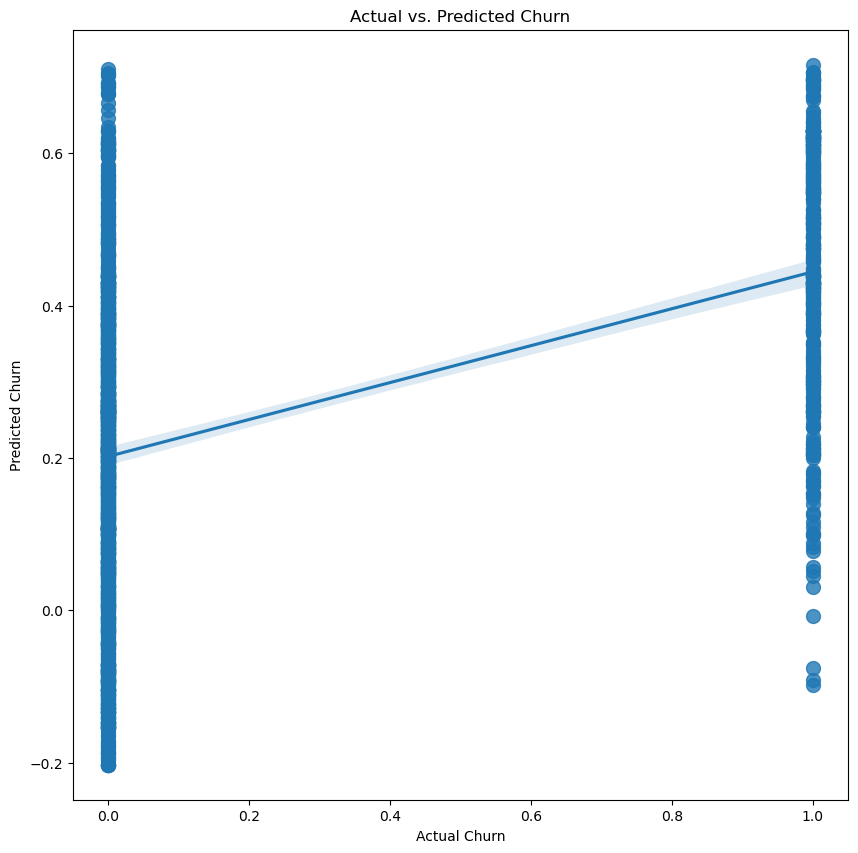

In [68]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.title('Actual vs. Predicted Churn')
plt.show()

# Decision Tree

In [115]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [117]:
plt.figure(figsize=(8,6))
plot_tree(clf, filled=True, 
          feature_names=[1,2,3,4], 
          class_names=['Churn'], 
          rounded=True)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1872345066.py, line 3)